In [1]:
import pandas as pd
import networkx as nx
import seaborn as sns
import numpy as np
import community
from collections import Counter
import matplotlib.colors as colors

In [2]:
df=pd.read_csv('data.tsv', sep="\t")
df.head()

,#Drug,Gene
0,DB00357,P05108
1,DB02721,P00325
2,DB00773,P23219
3,DB07138,Q16539
4,DB08136,P24941


In [4]:
print("Number of unique nodes",len(g.nodes()))

Number of unique person 7341


In [3]:
df.to_csv('Dataset.csv',header=False,index=False)
g=nx.read_edgelist('Dataset.csv',delimiter=',',create_using=nx.DiGraph())
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 7341
Number of edges: 15138
Average in degree:   2.0621
Average out degree:   2.0621


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
pd.read_csv('Dataset.csv',nrows=10).to_csv('MyExp.csv',header=False,index=False)
r=nx.read_edgelist('MyExp.csv',delimiter=',',create_using=nx.DiGraph())
print(nx.info(r))

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 10
Average in degree:   0.5000
Average out degree:   0.5000


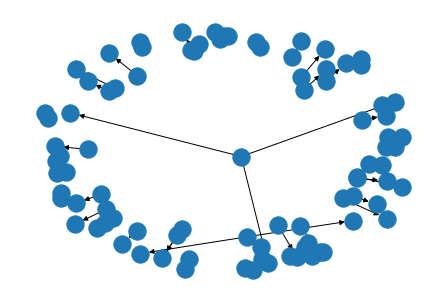

In [25]:
nx.draw(r)

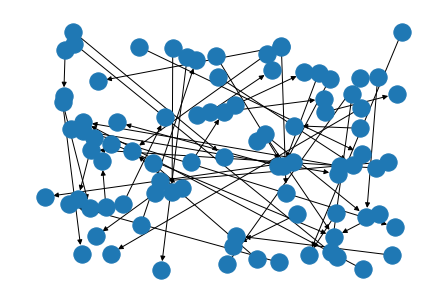

In [27]:
nx.draw_random(r)


([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0.

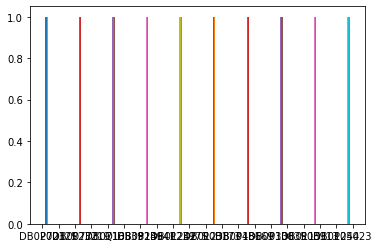

In [23]:
plt.hist(r)

In [ ]:
pd.read_csv('Dataset.csv',nrows=10).to_csv('MyExp.csv',header=False,index=False)
subgraph=nx.read_edgelist('MyExp.csv',delimiter=',',create_using=nx.DiGraph())




Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 10
Average in degree:   0.5000
Average out degree:   0.5000


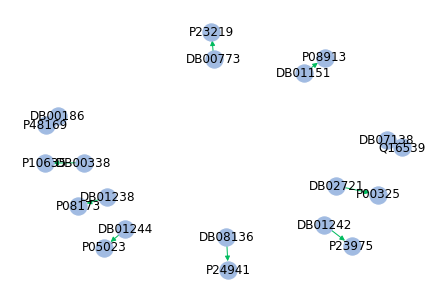

In [78]:
pos=nx.spring_layout(subgraph) # spring = circle layout
nx.draw(subgraph,pos,node_color='#A1BBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
print(nx.info(subgraph))

7341
584


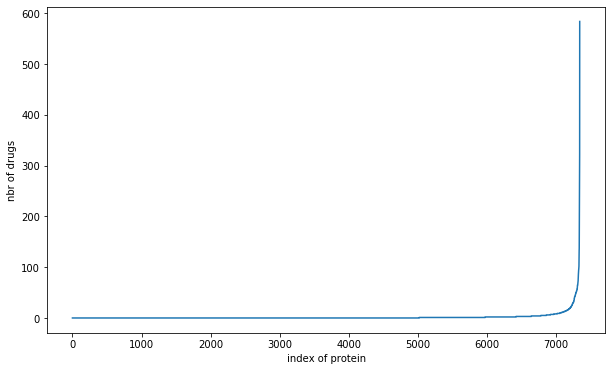

In [6]:
indegree_dist = list(dict(g.in_degree()).values())
print(len(g.in_degree()))
print(max(indegree_dist))
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('index of protein')
plt.ylabel('nbr of drugs')
plt.show()

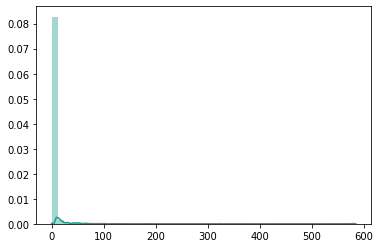

In [12]:
sns.distplot(indegree_dist, color='purple')

7341
147


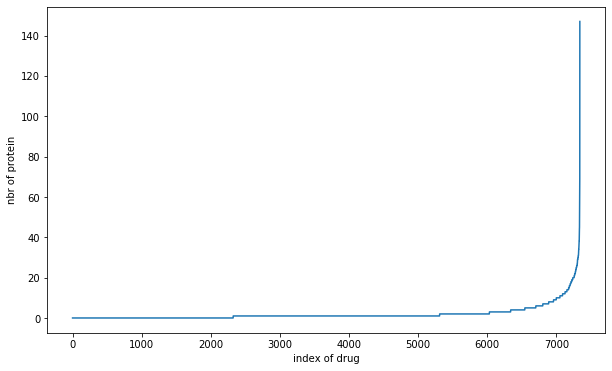

In [7]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
print(len(g.out_degree()))
print(max(outdegree_dist))
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('index of drug')
plt.ylabel('nbr of protein')
plt.show()

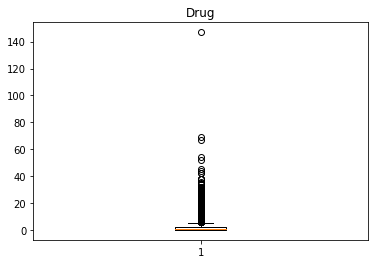

In [13]:
plt.boxplot(outdegree_dist)
plt.title("Drug")
plt.show()

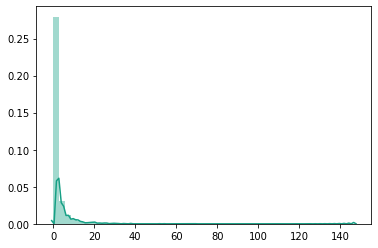

In [14]:
sns.distplot(outdegree_dist, color='#16A085')

In [13]:
# Proteins who are not linking anything
print('No of proteins that are not linking anything is ' ,sum(np.array(indegree_dist)==0),'==',
        sum(np.array(indegree_dist)==0)*100/len(indegree_dist),' % ')

No of proteins that are not linking anything is  5017 == 68.34218771284566  % 


In [16]:
# Drug who are not linking anything
print('No of Drug that are not linking anything' ,sum(np.array(outdegree_dist)==0),'==',
        sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist),' % ')

No of Drug that are not linking anything 2324 == 31.65781228715434  % 


# Fruchterman Reingold Algorithm

Total number of Edges= 15139
Total number of Nodes= 7343


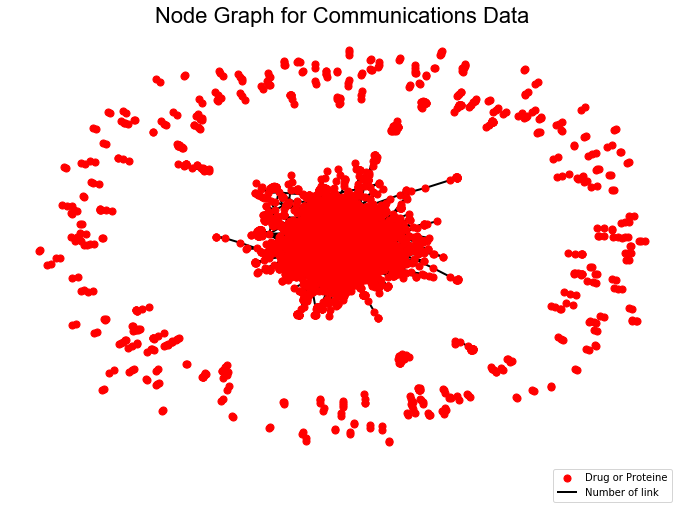

In [25]:
# Figure Dimensions
value_height=9
value_width=16
mpl.rcParams['figure.figsize']=[12, 8]

# Reading in the data for the Inviters and Invitees from the the Bloomberg Chat Data
df = pd.read_csv('data.tsv', sep="\t")

# Creating a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df, '#Drug', 'Gene')
for index, row in df.iterrows():
    G.add_edge(row['#Drug'], row['Gene'])
    
# Position nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G)
# Drawing the graph
nx.draw_networkx_nodes(G, pos, with_labels=True, node_size=40,font_size=9,node_color='red', label='Drug or Proteine')
nx.draw_networkx_edges(G, pos, with_labels=False, width=2.0,label='Number of link')
plt.title('Node Graph for Communications Data', fontsize=30, fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0), loc='best', ncol=1)

print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))

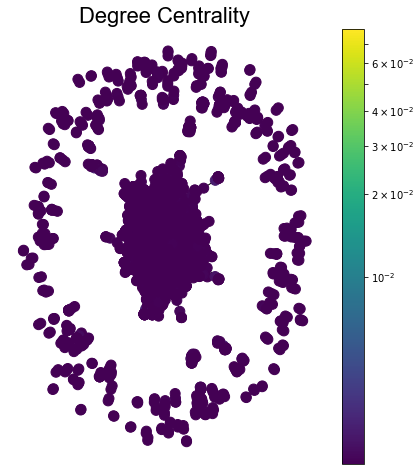

In [37]:
# Calculating Centrality metrics for the Graph
dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Top 10 nodes with the largest values of degree centrality in descending order

dict(Counter(dict_degree_centrality).most_common(10))

# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(dict_closeness_centrality).most_common(10))

# Top 10 nodes with the largest values of eigenvector centrality in descending order
dict(Counter(dict_eigenvector_centrality).most_common(10))

# Function to plot the graphs for each centrality metric
mpl.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(colors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')



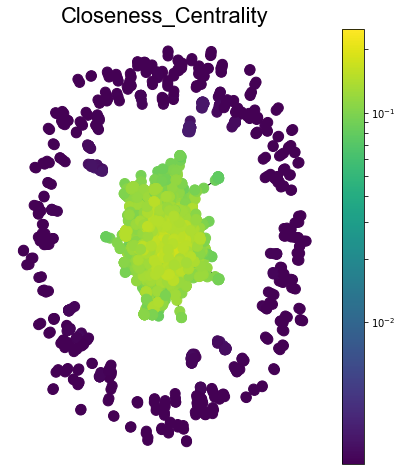

In [38]:
plt.subplot(1,3,1)
list_pos_values = []
for i in nx.closeness_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.closeness_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Closeness_Centrality')

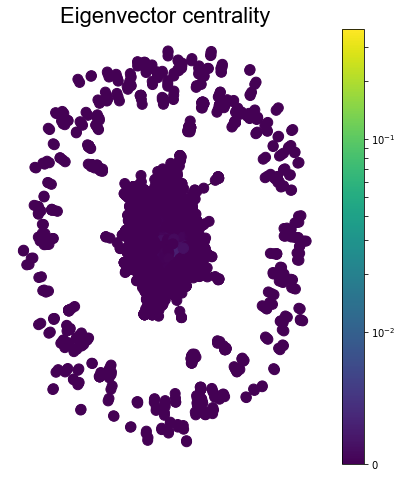

In [39]:
plt.subplot(1,3,1)
list_pos_values = []
for i in nx.eigenvector_centrality_numpy(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.eigenvector_centrality_numpy(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Eigenvector centrality')

# Community detection Algorithm

In [ ]:
partition=community.best_partition(G, weight='MsgCount')
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=dict_nodes.get(community_num) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('Community_List_snippet.csv')

# Creating a new graph to represent the communities created by the Louvain algorithm
plt.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))


Completed Louvain algorithm .. . . 
Modularity:  0.7516335588777298
Total number of Communities= 262


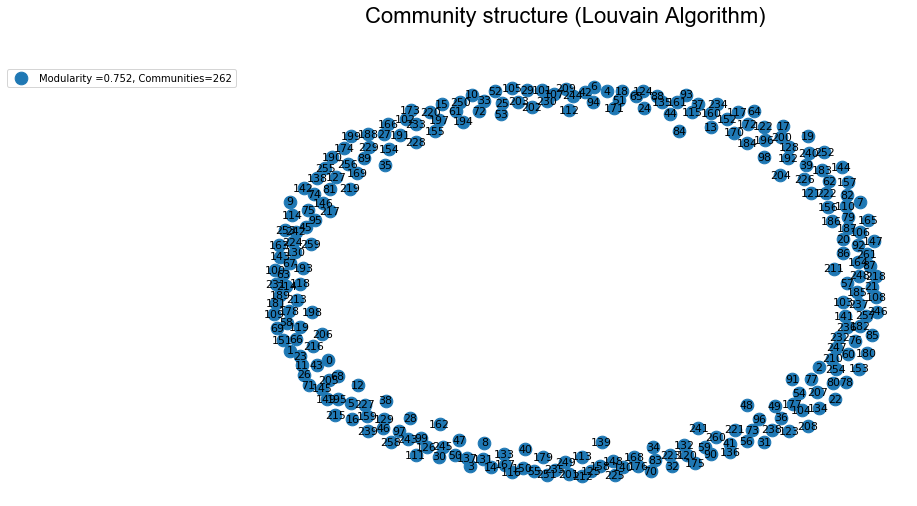

In [48]:
# Creating the Graph and  calculating Modularity
plt.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
